In this notebook, I experimented with the degree with the nodes. I counted both the in-degree and the out-degree distributions of the nodes in the graph, plotted them and checked how many nodes have both in-degree of 0 and out-degree of 0.

Result: more than 430k out of ~600k nodes have no incoming our outgoing edges (their in-degree and out-degree is 0). Maybe we could consider removing these from the data?

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
G = nx.DiGraph()

In [4]:
# copied from graph_analysis script
def parse_data():
    with open('outputacm.txt', 'r',  encoding="utf8") as f:
        reference={}
        article_title=''
        citations=[]
        readFile = f.readlines()
        for line in readFile:
            
            if '#index' in line: # index
                G.add_node(line[6:].rstrip())
                reference['index'] = line[7:].rstrip()
                G.add_node(reference['index'], title=article_title)
            elif '#*' in line: # article title
                reference['citations'] = citations
                try:
                    yield reference
                except IndexError as e:
                    continue
                reference={}
                citations=[]
                title=(line[3:].rstrip())
                reference['title'] = line[2:].rstrip()
            elif '#@' in line: # authors
                reference['author'] = line[2:].rstrip().rsplit(";")
            elif '#t' in line: # year published
                reference['year'] = line[2:].rstrip()
            elif '#c' in line: # journal
                reference['journal'] = line[2:].rstrip()
            elif '#%' in line: # id of cited paper
                G.add_edge(reference['index'], line[2:].rstrip())
                citations.append(line[2:].rstrip())
            elif '#!' in line: # abstract
                reference['abstract'] = line[2:].rstrip()

In [5]:
data = pd.DataFrame(parse_data(), columns =('index', 'title', 'author', 'year', 'journal', 'citations', 'abstract'))

In [6]:
# average in-degree and out-degree is the same
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 640925
Number of edges: 632634
Average in degree:   0.9871
Average out degree:   0.9871


In [ ]:
def get_data_to_plot(graph, degree):
    if degree == 'in_degree':
        lista = list(dict(graph.in_degree()).values())
    elif degree == 'out_degree':
        lista = list(dict(graph.out_degree()).values())
    x_graph = sorted(set(lista))
    value_counts = Counter(lista)
    y_graph = []
    for key in sorted(value_counts):
        y_graph.append(value_counts[key])
    return x_graph, y_graph

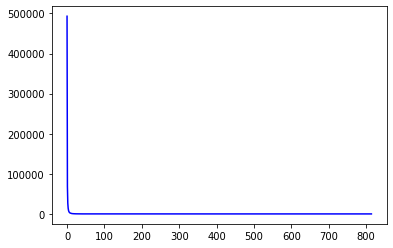

In [32]:
# plot the in-degree of the graph

fig, ax = plt.subplots()
x_graph, y_graph = get_data_to_plot(G, 'in_degree')
#ax.loglog(x_graph, y_graph, color='b', label='G(1226, {})'.format(0.01))
ax.plot(x_graph, y_graph, color='b')
plt.show()

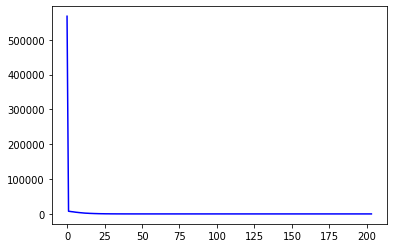

In [33]:
# plot the out-degree of the graph

fig, ax = plt.subplots()
x_graph, y_graph = get_data_to_plot(G, 'out_degree')
#ax.loglog(x_graph, y_graph, color='b', label='G(1226, {})'.format(0.01))
ax.plot(x_graph, y_graph, color='b')
plt.show()

In [49]:
# distribution of in-degrees of the nodes in the graph
# (number of articles referring to each node):
in_degrees = [v for n, v in G.in_degree()]

# all nodes with in-degree of zero:
in_degree_zero = [n for n, v in G.in_degree() if v == 0]

in_degree_distribution = Counter(in_degrees)
for k, v in sorted(in_degree_distribution.items())[:20]:
    print(k, v)
print('...')
for k, v in sorted(in_degree_distribution.items())[-5:]:
    print(k, v)

# 493k nodes have an in-degree of 0. Biggest in-degree value: 814

0 492981
1 68379
2 26905
3 14245
4 8581
5 5756
6 4080
7 2987
8 2302
9 1963
10 1568
11 1238
12 1008
13 859
14 732
15 638
16 540
17 502
18 464
19 384
...
565 1
588 1
645 1
791 1
814 1


In [48]:
out_degrees = [v for n, v in G.out_degree()]

# all nodes with out-degree of zero:
out_degree_zero = [n for n, v in G.out_degree() if v == 0]

out_degree_distribution = Counter(out_degrees)
for k, v in sorted(out_degree_distribution.items())[:20]:
    print(k, v)
print('...')
for k, v in sorted(out_degree_distribution.items())[-5:]:
    print(k, v)
    
# 567k nodes have an out-degree of 0. Biggest out-degree value: 203

0 567208
1 7707
2 7118
3 6497
4 6028
5 5393
6 4788
7 4373
8 3847
9 3446
10 3055
11 2654
12 2280
13 2055
14 1864
15 1569
16 1422
17 1270
18 1076
19 964
...
154 1
156 1
182 1
190 1
203 1


In [43]:
# number of nodes that have both an out-degree of 0 and in-degree of 0:

print(len(set(in_degree_zero).intersection(out_degree_zero)))

430502
